# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls '/content/drive/My Drive/тинькофф/сем 4 классификация/'

 creditcard.csv		      'Копия блокнота "inclass_classification.ipynb"'
 pulsar_stars.csv	      'Копия блокнота "Task 4.ipynb"'
 Video_games_esrb_rating.csv


In [ ]:
import pandas as pd 
data = pd.read_csv('/content/drive/My Drive/тинькофф/сем 4 классификация/creditcard.csv')


In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
X = data.drop(columns=['Class', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'])
y = data['Class']

In [ ]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Amount
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,-0.010596
V1,0.117396,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.227709
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.531409
V3,-0.419618,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.210880
V4,-0.105260,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.098732
V5,0.173072,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.386356
V6,-0.063016,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.215981
V7,0.084714,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.397311
V8,-0.036949,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.103079
V9,-0.008660,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.044246


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 199008, 1: 356})

#### метрики

In [ ]:
def f1(y_real, y_pred):
    return f1_score(y_real, y_pred)

def roc_auc(y_real, y_pred):
    return roc_auc_score(y_real, y_pred)

def precision(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / (np.where(y_pred == 1)[0].shape[0] + 1e-16)

def recall(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / (np.where(y_real == 1)[0].shape[0] + 1e-16)

def accuracy(y_real, y_pred):
    return np.where(y_pred == y_real)[0].shape[0] / y_real.shape[0]

#### константа

In [ ]:
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print('precision', precision(y_test, y_pred_proba_const))
print('recall', recall(y_test, y_pred_proba_const))
print('accuracy', accuracy(y_test, y_pred_proba_const))
print('roc_auc', roc_auc(y_test, y_pred_proba_const))
print('f1', f1(y_test, y_pred_proba_const))

precision 0.0
recall 0.0
accuracy 0.9984082955888721
roc_auc 0.5
f1 0.0


#### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print('precision', precision(y_test, y_pred_knn))
print('recall', recall(y_test, y_pred_knn))
print('accuracy', accuracy(y_test, y_pred_knn))
print('roc_auc', roc_auc(y_test, y_pred_knn))
print('f1', f1(y_test, y_pred_knn))

precision 1.0
recall 0.04411764705882353
accuracy 0.9984785178423042
roc_auc 0.5220588235294118
f1 0.08450704225352113


#### Log Regression

In [ ]:
log_reg_w = LogisticRegression(class_weight={0: 199008, 1: 356},  max_iter=100000)
log_reg_w.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 199008, 1: 356}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
y_pred_w_proba = log_reg_w.predict_proba(X_test)
y_pred_w = log_reg_w.predict(X_test)

In [ ]:
/print('precision', precision(y_test, y_pred_w))
print('recall', recall(y_test, y_pred_w))
print('accuracy', accuracy(y_test, y_pred_w))
print('roc_auc', roc_auc(y_test, y_pred_w))
print('f1', f1(y_test, y_pred_w))

SyntaxError: ignored

In [ ]:
y_pred_w_proba[:,1].shape

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_w_proba[:,1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

#### boosting

In [ ]:
pip install catboost

     |████████████████████████████████| 65.7MB 47kB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

In [ ]:
model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU")

model.fit(X_train,
          y_train,
          verbose=False)

preds_class = model.predict(X_test)

In [ ]:
print('precision', precision(y_test, preds_class))
print('recall', recall(y_test, preds_class))
print('accuracy', accuracy(y_test, preds_class))
print('roc_auc', roc_auc(y_test, preds_class))
print('f1', f1(y_test, preds_class))

precision 0.9401709401709402
recall 0.8088235294117647
accuracy 0.9996137776061234
roc_auc 0.9043707364198097
f1 0.8695652173913043


In [ ]:
preds_class_proba = model.predict_proba(X_test)

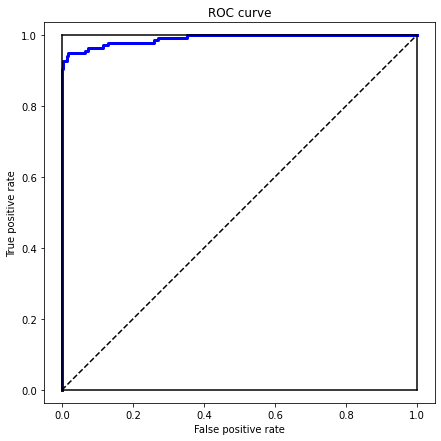

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, preds_class_proba[:,1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

#### parameter search

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

### обоснование:
Реальные данные имеют тенденцию иметь дисбаланс между положительными и отрицательными образцами. Этот дисбаланс имеет большое влияние на PR, но не на ROC / AUC.

Таким образом, в реальном мире кривая PR используется больше, поскольку положительные и отрицательные выборки очень неравномерны. Кривая ROC / AUC не отражает производительность классификатора, но кривая PR может

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [ ]:
model_grid = CatBoostClassifier(iterations=100, 
                           task_type="GPU")

grid = {'learning_rate': [0.03, 0.1],
        'depth': [3, 4],
        'l2_leaf_reg': [5, 9]}

grid_search_result = model_grid.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,  
                                       plot=True)

In [ ]:
# best params 'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.1

model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           depth = 4,
                           l2_leaf_reg = 5,
                           learning_rate = 0.1)

model.fit(X_train,
          y_train,
          verbose=False)

preds_class = model.predict(X_test)

In [ ]:
print('precision', precision(y_test, preds_class))
print('recall', recall(y_test, preds_class))
print('accuracy', accuracy(y_test, preds_class))
print('roc_auc', roc_auc(y_test, preds_class))
print('f1', f1(y_test, preds_class))

precision 0.9401709401709402
recall 0.8088235294117647
accuracy 0.9996137776061234
roc_auc 0.9043707364198097
f1 0.8695652173913043


# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

#### https://www.kaggle.com/imohtn/video-games-rating-by-esrb
я выбрал датасет по классификации рейтинга игр

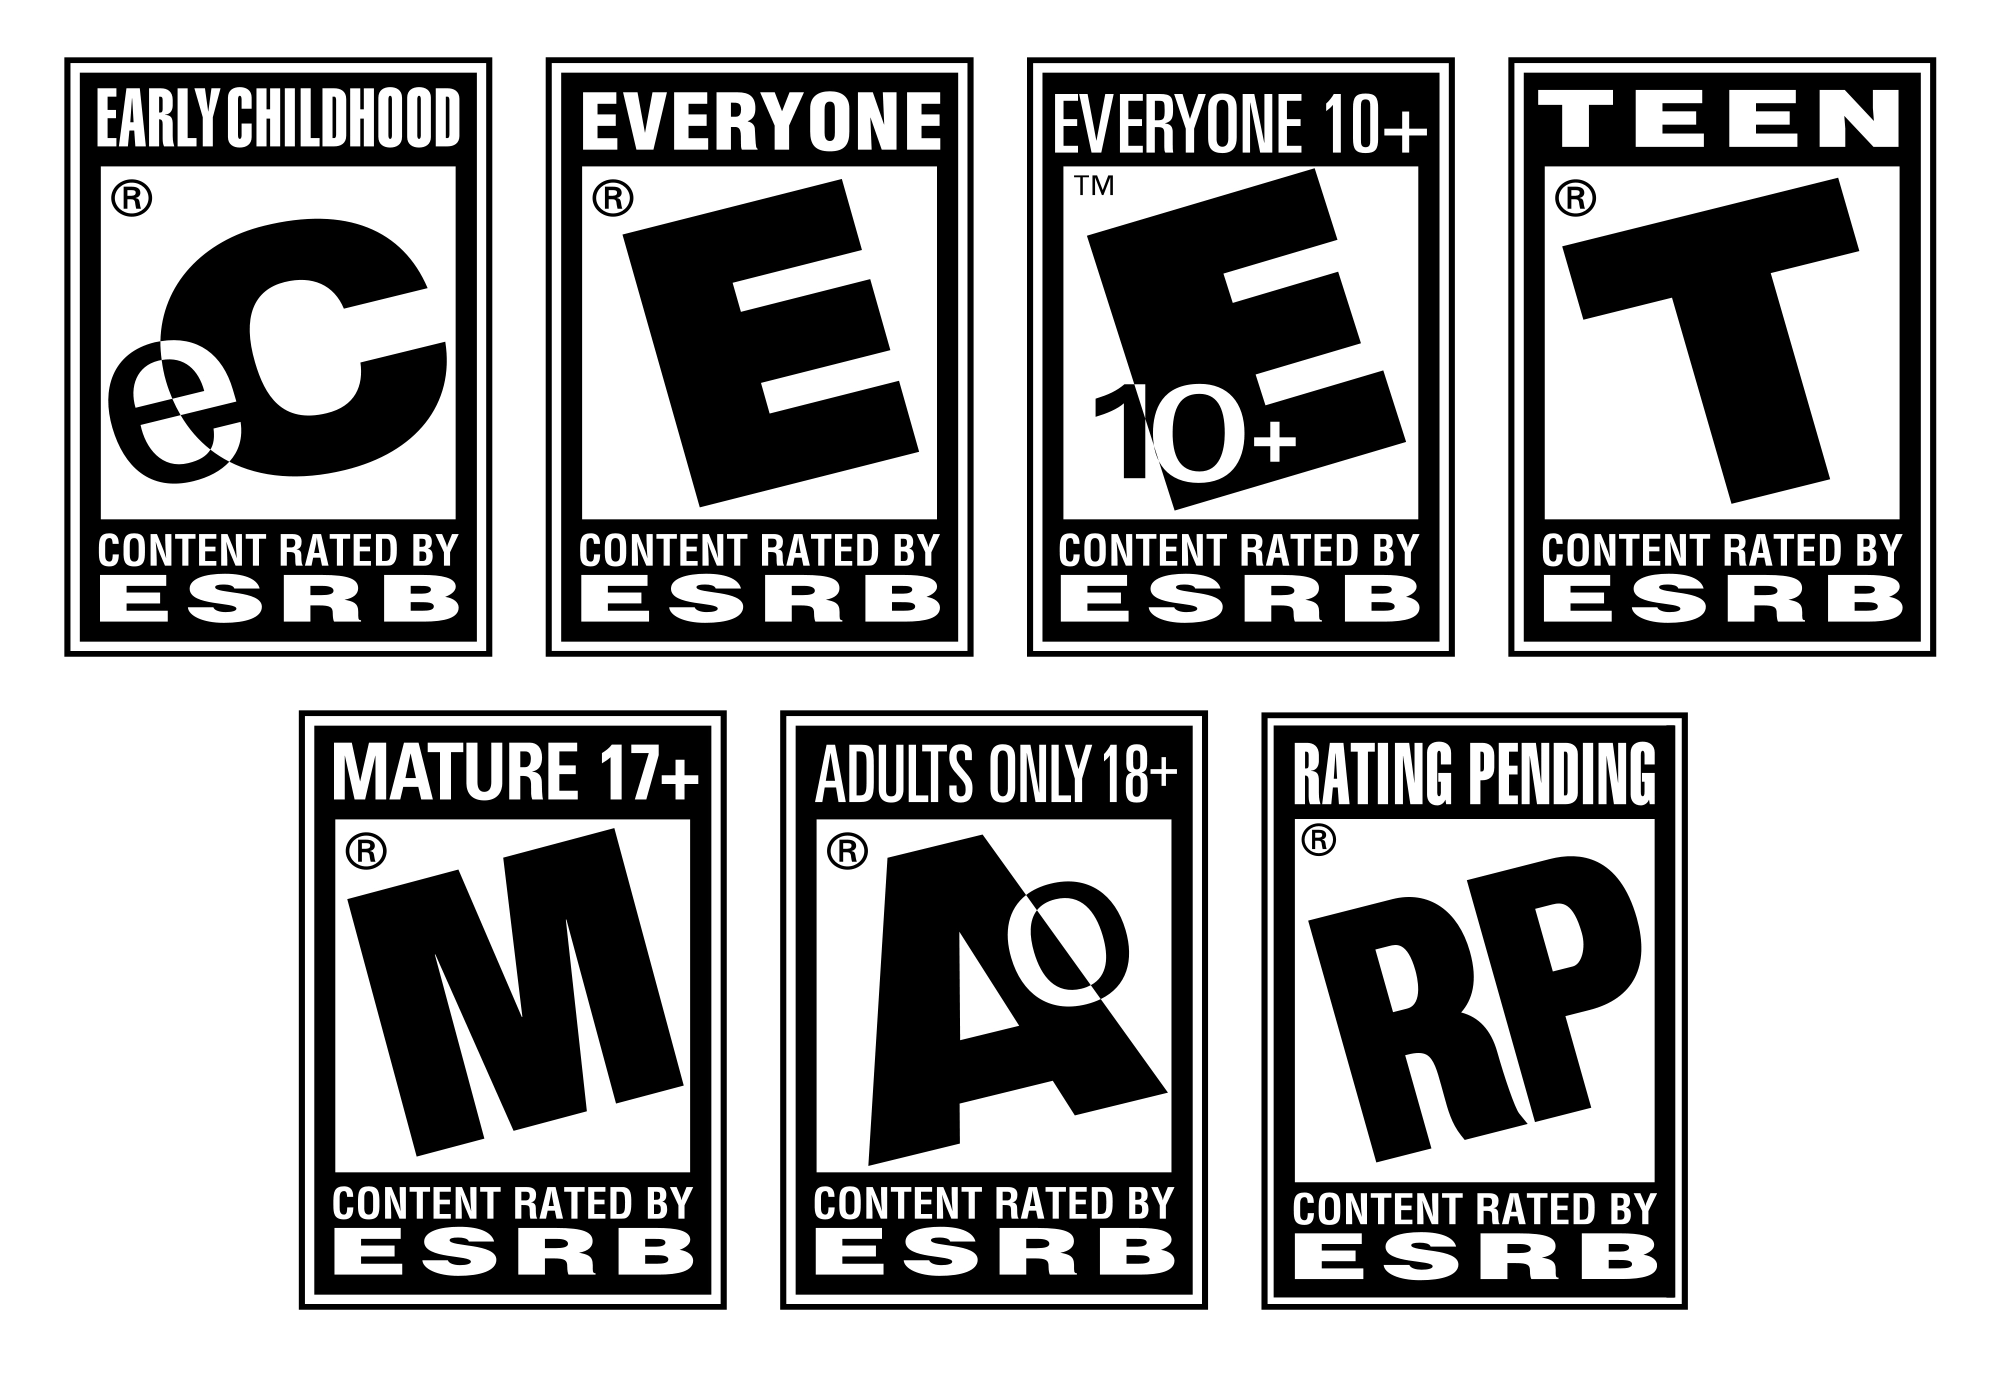


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
!ls '/content/drive/My Drive/тинькофф/сем 4 классификация/'

 creditcard.csv		      'Копия блокнота "inclass_classification.ipynb"'
 pulsar_stars.csv	      'Копия блокнота "Task 4.ipynb"'
 Video_games_esrb_rating.csv


In [ ]:
data = pd.read_csv('/content/drive/My Drive/тинькофф/сем 4 классификация/Video_games_esrb_rating.csv')

In [ ]:
X = data.drop(columns=['title', 'esrb_rating'])
y = data['esrb_rating']



In [ ]:
Counter(y)

Counter({'E': 416, 'ET': 403, 'M': 387, 'T': 689})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array(['E', 'T', 'ET', 'E', 'ET', 'M', 'T', 'E', 'ET', 'ET', 'ET', 'T',
       'ET', 'E', 'T', 'T', 'E', 'E', 'T', 'T', 'ET', 'T', 'T', 'M', 'E',
       'E', 'T', 'M', 'T', 'T', 'T', 'E', 'T', 'T', 'ET', 'T', 'E', 'E',
       'T', 'T', 'E', 'E', 'T', 'ET', 'T', 'T', 'T', 'T', 'M', 'E', 'E',
       'ET', 'ET', 'ET', 'T', 'T', 'T', 'E', 'E', 'E', 'ET', 'ET', 'T',
       'E', 'ET', 'E', 'T', 'T', 'M', 'E', 'M', 'T', 'T', 'T', 'E', 'M',
       'E', 'E', 'E', 'E', 'M', 'E', 'M', 'ET', 'T', 'M', 'E', 'E', 'E',
       'E', 'E', 'T', 'T', 'M', 'M', 'E', 'T', 'ET', 'T', 'M', 'T', 'ET',
       'T', 'T', 'M', 'T', 'E', 'ET', 'T', 'E', 'ET', 'ET', 'E', 'T', 'T',
       'E', 'ET', 'T', 'T', 'T', 'ET', 'T', 'T', 'T', 'E', 'T', 'M', 'T',
       'T', 'M', 'T', 'T', 'M', 'ET', 'M', 'E', 'T', 'ET', 'ET', 'T', 'M',
       'ET', 'ET', 'T', 'E', 'E', 'T', 'T', 'E', 'ET', 'T', 'T', 'T',
       'ET', 'T', 'T', 'E', 'E', 'T', 'ET', 'E', 'E', 'M', 'ET', 'T',
       'ET', 'M', 'T', 'T', 'ET', 'E', 'E', 'E', 'M'

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array(['E', 'T', 'ET', 'E', 'T', 'M', 'M', 'E', 'ET', 'ET', 'ET', 'ET',
       'T', 'E', 'T', 'T', 'E', 'E', 'M', 'T', 'ET', 'T', 'T', 'M', 'E',
       'E', 'T', 'M', 'T', 'T', 'T', 'E', 'ET', 'T', 'ET', 'T', 'E', 'E',
       'T', 'ET', 'E', 'E', 'ET', 'T', 'T', 'T', 'T', 'T', 'M', 'E', 'E',
       'ET', 'E', 'ET', 'T', 'T', 'T', 'E', 'E', 'E', 'ET', 'ET', 'ET',
       'E', 'E', 'E', 'T', 'T', 'M', 'E', 'M', 'T', 'T', 'ET', 'E', 'M',
       'E', 'E', 'E', 'E', 'M', 'E', 'M', 'T', 'T', 'M', 'E', 'E', 'E',
       'E', 'E', 'T', 'T', 'M', 'T', 'E', 'E', 'ET', 'T', 'M', 'T', 'T',
       'T', 'T', 'M', 'T', 'E', 'ET', 'M', 'E', 'E', 'ET', 'E', 'T', 'T',
       'E', 'ET', 'T', 'T', 'T', 'ET', 'T', 'T', 'T', 'E', 'M', 'M', 'T',
       'E', 'M', 'M', 'T', 'M', 'ET', 'M', 'E', 'T', 'E', 'ET', 'T', 'M',
       'ET', 'ET', 'T', 'E', 'E', 'T', 'T', 'E', 'E', 'T', 'T', 'T', 'ET',
       'T', 'T', 'E', 'E', 'T', 'ET', 'E', 'E', 'T', 'ET', 'T', 'ET', 'M',
       'T', 'ET', 'E', 'E', 'E', 'E', 'M', 'E

In [ ]:
print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))

0.8654353562005277
0.8153034300791556


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

#### accuracy хорошо переносится на небинарную классификацию, в датасете не сильного перевеса по классам

In [ ]:
model_grid = CatBoostClassifier(iterations=100, 
                           task_type="GPU")

grid = {'learning_rate': [0.03, 0.1],
        'depth': [3, 4, 5],
        'l2_leaf_reg': [5, 9]}

grid_search_result = model_grid.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,  
                                       plot=True)

In [ ]:
model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           depth = 5,
                           l2_leaf_reg = 5,
                           learning_rate = 0.1)

model.fit(X_train,
          y_train,
          verbose=False)

preds_class = model.predict(X_test)

In [ ]:
preds_class = preds_class.reshape(preds_class.shape[0])

In [ ]:
print('precision', precision(y_test, preds_class))
print('recall', recall(y_test, preds_class))
print('accuracy', accuracy(y_test, preds_class))

precision 0.0
recall 0.0
accuracy 0.8733509234828496


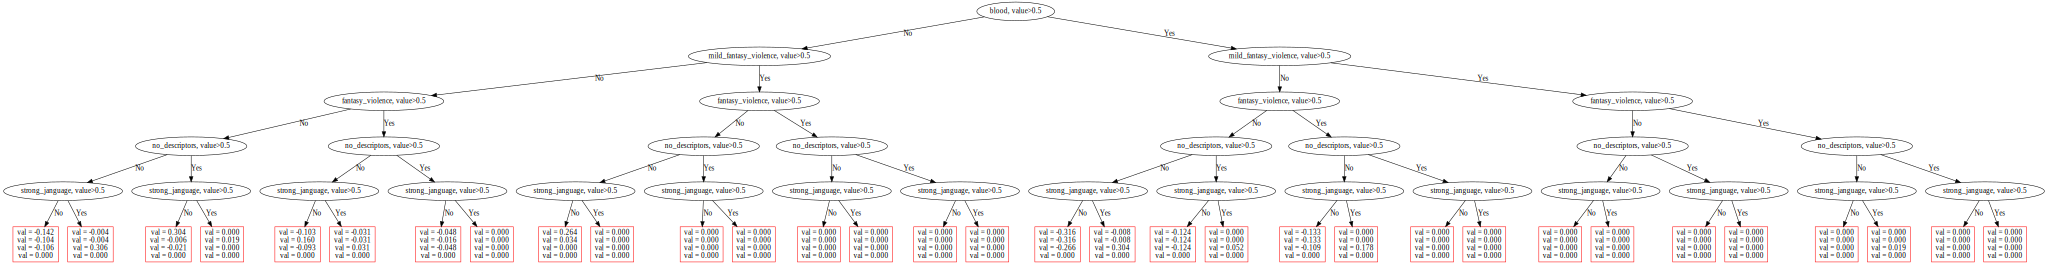

In [ ]:
pool = Pool(X, y)

model.plot_tree(
    tree_idx=0,
    pool=pool
)

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,blood,17.662408
1,strong_janguage,13.956087
2,no_descriptors,10.043675
3,fantasy_violence,8.918551
4,blood_and_gore,8.192446
5,suggestive_themes,4.853708
6,language,4.702432
7,mild_fantasy_violence,4.108821
8,violence,3.563961
9,mild_blood,2.715710


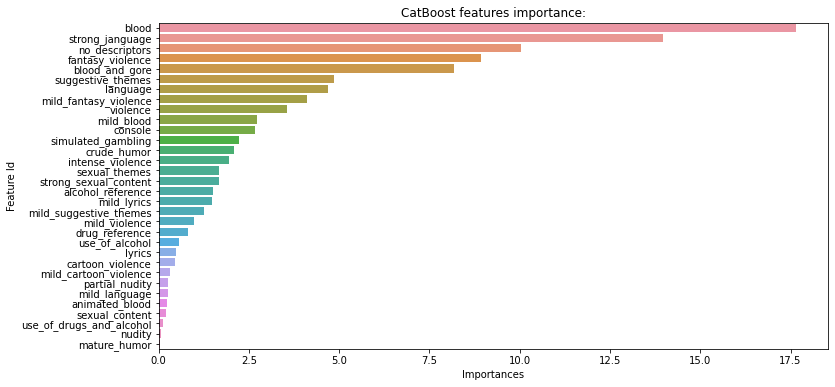

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=model.get_feature_importance(prettified=True));
plt.title('CatBoost features importance:');